**K-nearest neighbors classifier (KNN)** is a simple and powerful classification learner. K-nearest neighbor (hay KNN) is a lazy machine learning.
KNN has three basic parts:
- $y_i$: The class of an observation (what we are trying to predict in the test data).
- $X_i$: The predictors/IVs/attributes of an observation.
- $K$: A positive number specified by the researcher. K denotes the number of observations closest to a particular observation that define its “neighborhood”. For example, K=2 means that each observation’s has a neighorhood comprising of the two other observations closest to it.

In [1]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
X_std = standardizer.fit_transform(X)

**Fit A k-Nearest Neighbor Classifier**

In [4]:
# Fit a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean',
                           n_jobs=-1).fit(X_std, y)

**Create Search Space Of Possible Values Of k**

In [5]:
# Create a pipeline
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

In [6]:
# Create space of candidate values
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

**Search Over Possible Values of k**

In [7]:
# Create grid search
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_std, y)

**View k For Best Performing Model**

In [8]:
# Best neighborhood size (k)
clf.best_estimator_.get_params()['knn__n_neighbors']

6

**Create Dataset**

In [9]:
# Here we create three variables, test_1 and test_2 are our independent variables, ‘outcome’ is our dependent variable. We will use this data to train our learner.

training_data = pd.DataFrame()
training_data['test_1'] = [
    0.3051, 0.4949, 0.6974, 0.3769, 0.2231, 0.341, 0.4436, 0.5897, 0.6308, 0.5
]
training_data['test_2'] = [
    0.5846, 0.2654, 0.2615, 0.4538, 0.4615, 0.8308, 0.4962, 0.3269, 0.5346,
    0.6731
]
training_data['outcome'] = [
    'win', 'win', 'win', 'win', 'win', 'loss', 'loss', 'loss', 'loss', 'loss'
]

In [10]:
training_data.head()

,test_1,test_2,outcome
0,0.3051,0.5846,win
1,0.4949,0.2654,win
2,0.6974,0.2615,win
3,0.3769,0.4538,win
4,0.2231,0.4615,win


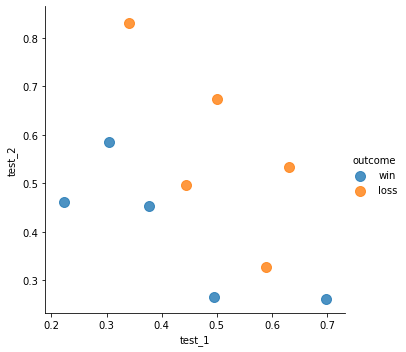

In [11]:
seaborn.lmplot('test_1',
               'test_2',
               data=training_data,
               fit_reg=False,
               hue="outcome",
               scatter_kws={
                   "marker": "D",
                   "s": 100
               })

**Convert Data Into np.arrays**

In [12]:
X_array = training_data[['test_1', 'test_2']].to_numpy()
y_array = np.array(training_data['outcome'])

**Train The Learner**
<br>This is our big moment. We train a KNN learner using the parameters that an observation’s neighborhood is its three closest neighors. weights = 'uniform' can be thought of as the voting system used. For example, uniform means that all neighbors get an equally weighted “vote” about an observation’s class while weights = 'distance' would tell the learner to weigh each observation’s “vote” by its distance from the observation we are classifying.

In [13]:
clf = KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(X_array, y_array)

**View The Model’s Score**
<br>How good is our trained model compared to our training data?

In [14]:
trained_model.score(X_array, y_array)

0.8

**Apply The Learner To A New Data Point**
<br>Now that we have trained our model, we can predict the class any new observation, $y_{test}$
Let us do that now!
- Create a new observation with the value of the first independent variable, 'test_1', as 0.4 and the second independent variable, test_1', as 0.6

In [15]:
x_test = np.array([[.4,.6]])
x_test

array([[0.4, 0.6]])

- Apply the learner to the new, unclassified observation.

In [16]:
trained_model.predict(x_test)

array(['loss'], dtype=object)

Huzzah! We can see that the learner has predicted that the new observation’s class is loss.
We can even look at the probabilities the learner assigned to each class:

In [17]:
trained_model.predict_proba(x_test)

array([[0.66666667, 0.33333333]])

According to this result, the model predicted that the observation was loss with a ~67% probability and win with a ~33% probability. Because the observation had a greater probability of being loss, it predicted that class for the observation.

**Notes**
- The choice of K has major affects on the classifer created.
- The greater the K, more linear (high bias and low variance) the decision boundary.
- There are a variety of ways to measure distance, two popular being simple euclidean distance and cosine similarity.

**Radius-Based Nearest Neighbor Classifier**

In [18]:
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(X_std, y)

In [19]:
# Create two observations
new_observations = [[ 1,  1,  1,  1]]

# Predict the class of two observations
rnn.predict(new_observations)

array([2])